## Unit 2: Lesson 2: Naive Bayes Simple Text Classifcation Notes

In [74]:

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
plt.rcParams['figure.figsize'] = (50.0, 20.0)
plt.rcParams.update({'font.size': 22})

In [133]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [147]:
# Look for keywords that might intuitively indicate SPAM and create feature variable keywords

keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [148]:
# Create new feature called allcaps that might intuitively indicate SPAM

sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [129]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

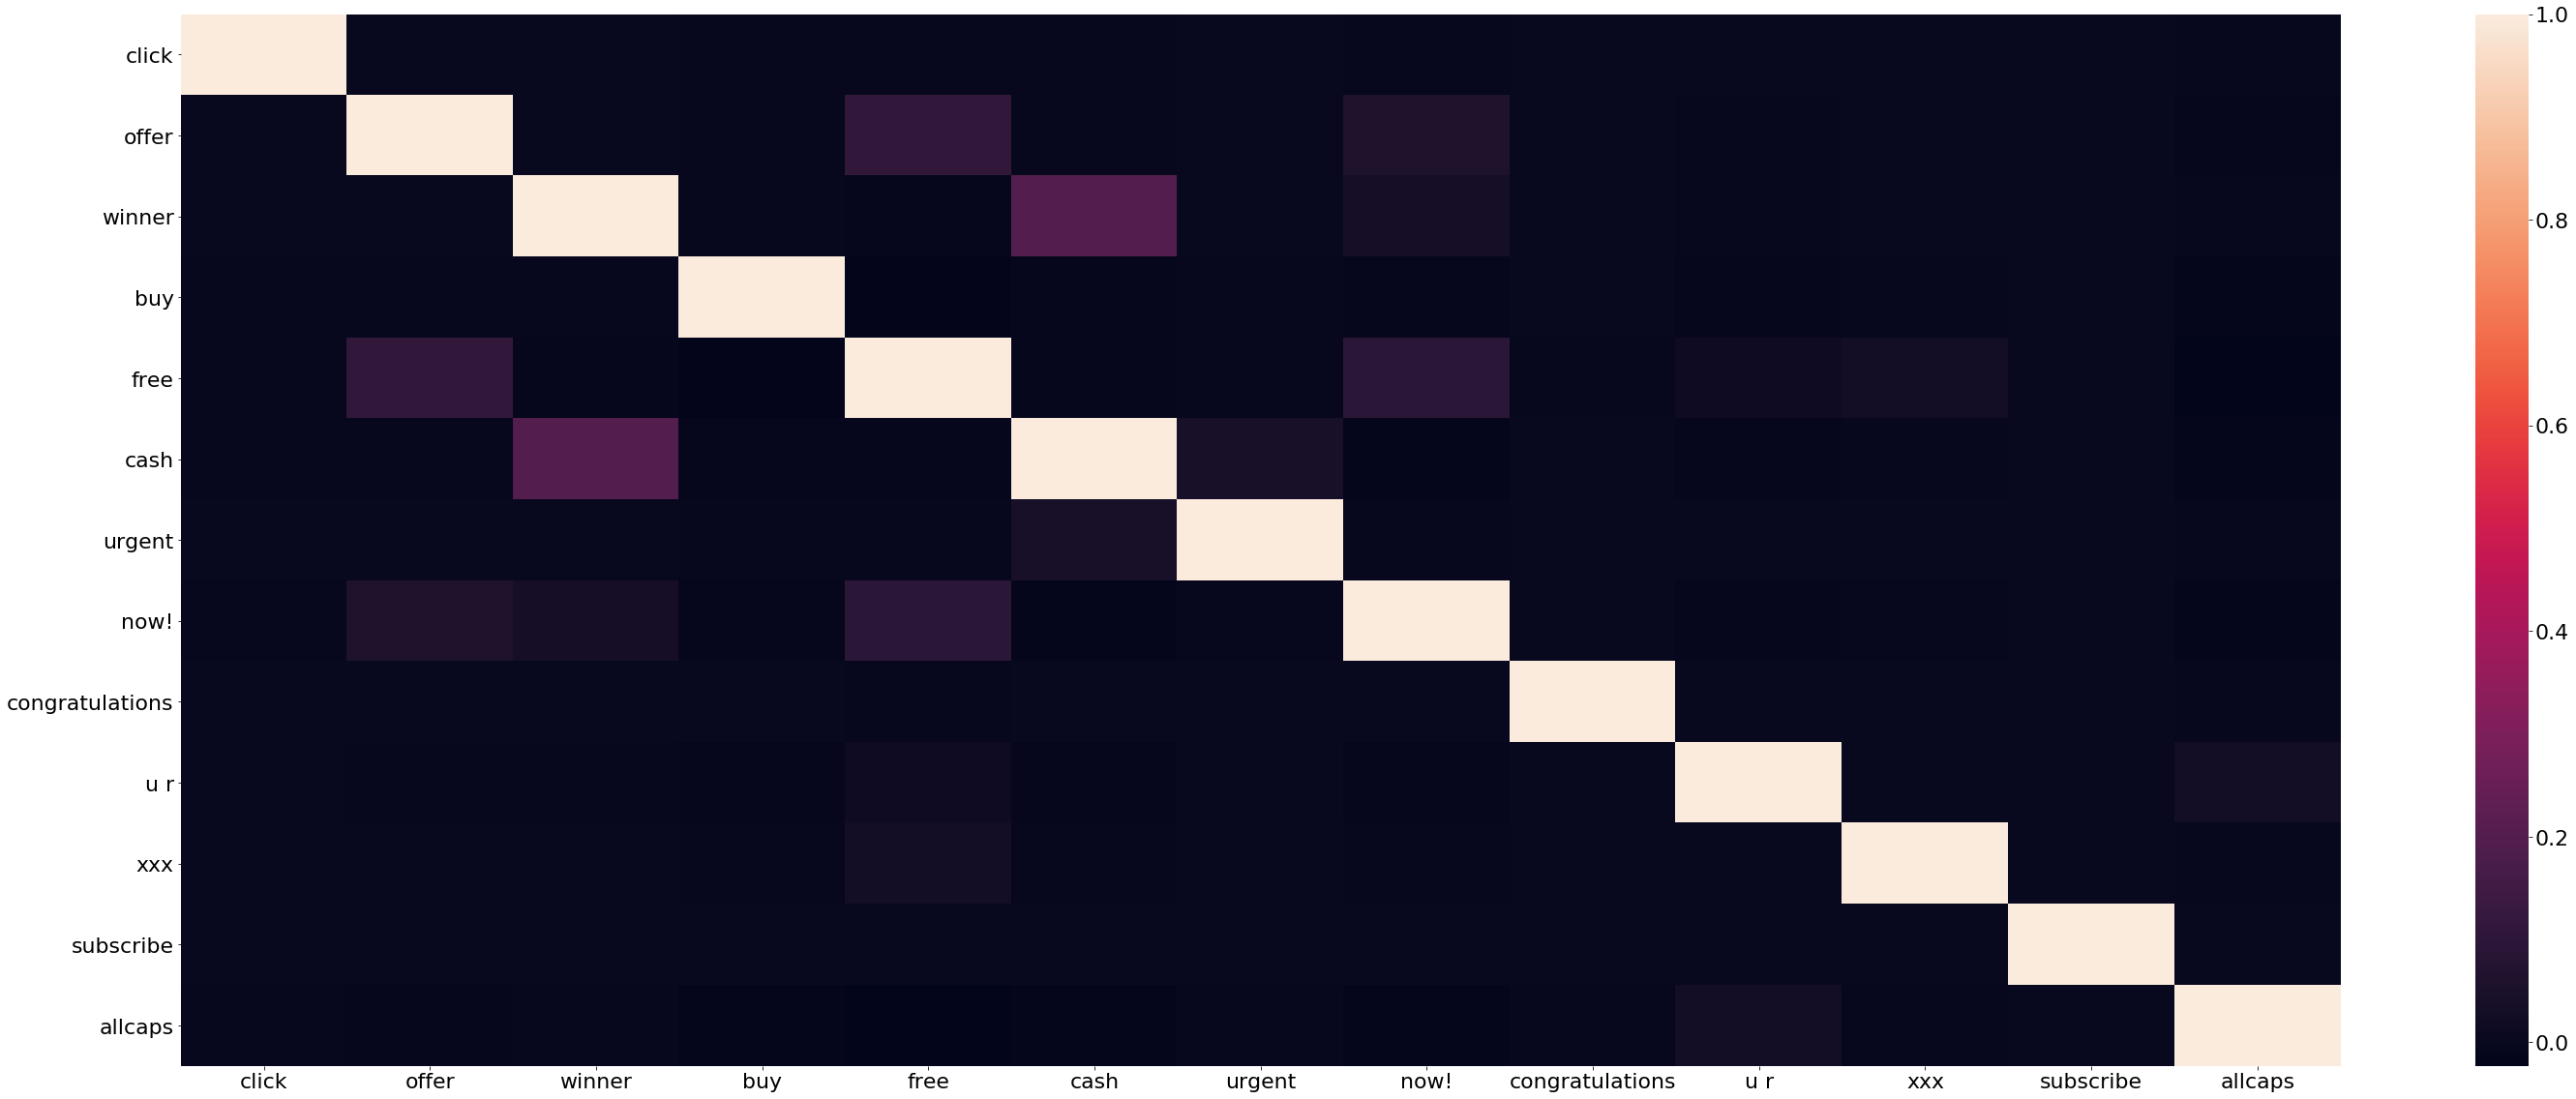

In [149]:
sns.heatmap(sms_raw.corr());

In [150]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [155]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


### If I wanted to game the system, I could change words like "urgent" to "urgently" - small changes to "spammy" words so that the spam filter would miss them.

In [156]:
sms_raw.loc[sms_raw['spam'] == 'spam'].head()

,spam,message,click,offer,winner,buy,free,cash,urgent,now!,congratulations,u r,xxx,subscribe,allcaps
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False,False,True,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,False,True,False,False,False
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",False,False,False,False,False,False,False,False,False,False,False,False,False


## Unit 2: Lesson 3: Accuracy Score Manual and Scikit Calculations

### Crosstab Counts and Percentages (manual count confusion matrix):

In [216]:
# Counts:
pd.crosstab(target, y_pred, rownames=['Actual'], colnames=['Predicted']).apply(lambda r: r)


Predicted,ham,spam
Actual,,
ham,4770,55
spam,549,198


In [218]:
# Percentages:
pd.crosstab(target, y_pred, rownames=['Actual %'], colnames=['Predicted %']).apply(lambda r: 100.0 * r/r.sum()).round(2)


Predicted %,ham,spam
Actual %,,
ham,89.68,21.74
spam,10.32,78.26


### Accuracy Scores:

In [257]:
# Method 1: Manual calculation of accuracy of model:
total = data.shape[0]

correct = ((target == y_pred).sum())
incorrect = ((target != y_pred).sum())

print('Accuracy Score: ', round(correct / total, 2))

Accuracy Score:  0.89


In [256]:
# Method 2: Sci-Kit Calculation accuracy of model:
from sklearn.metrics import accuracy_score

print('Accuracy Score: ', round(accuracy_score(target, y_pred), 2))


Accuracy Score:  0.89


### Confusion Matrix

In [191]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(target, y_pred)
confusion

array([[4770,   55],
       [ 549,  198]])

Confusion matrix, without normalization
[[4770   55]
 [ 549  198]]


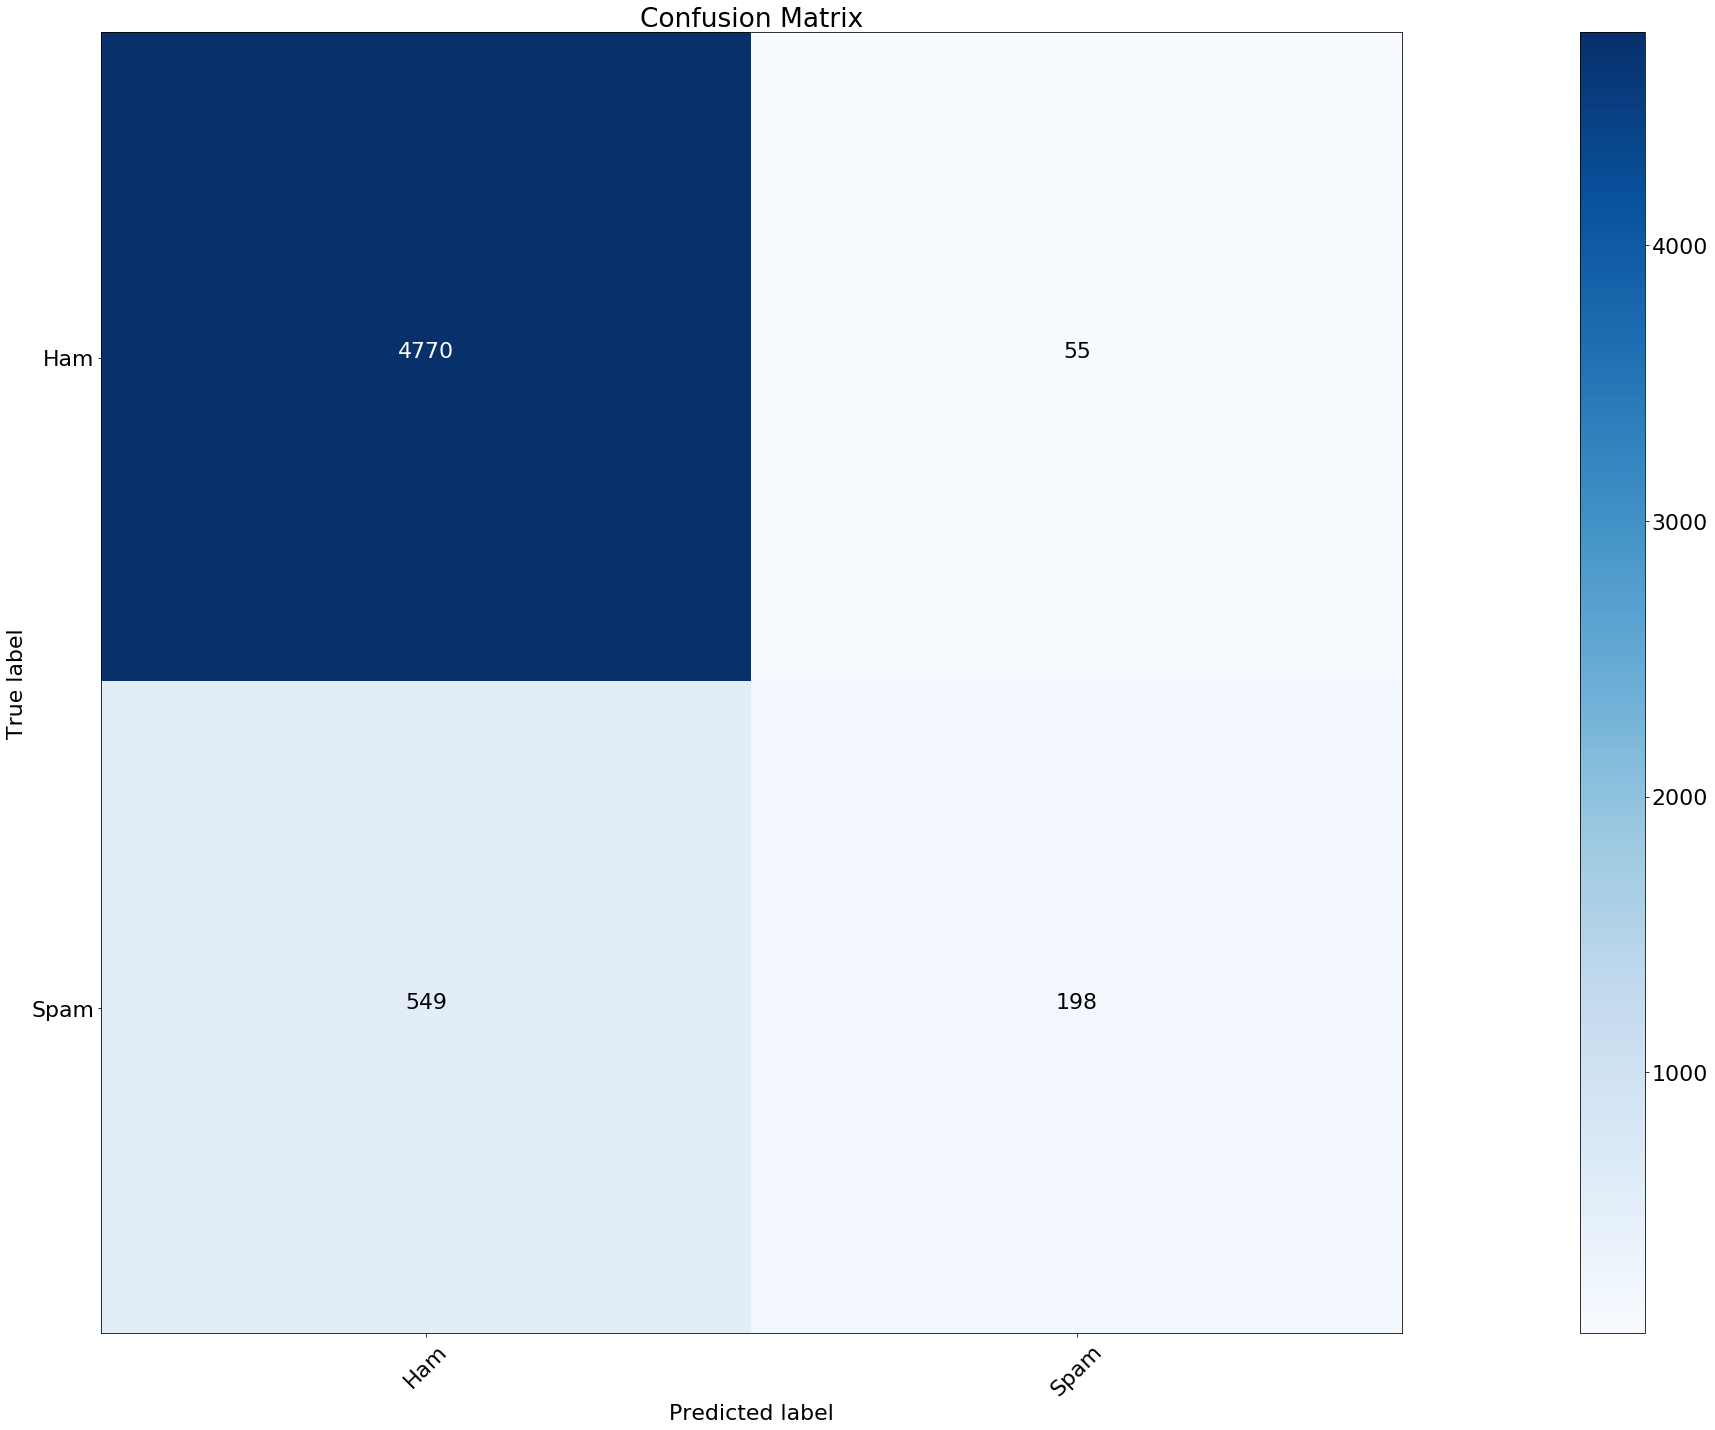

In [200]:
# Plot the Confusion Matrix
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(target, y_pred)
np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cm, classes=['Ham', 'Spam'], title='Confusion Matrix')

## Breakin' it down:

Accurate numbers are on the diagonal: 4770, 198

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

4770 messages were ham that I predicted would be ham (True Negative):
--
Col 0: my prediction for 0 (ham)

Row 0: actual count of 0 (ham)


55 messages were ham that I predicted would be spam (False Positive):
--
Col 1: my prediction for 1 (spam)

Row 0: actual count of 0 (ham)


549 messages were spam that I predicted would be ham (False Negative):
--
Col 0: my prediction for 0 (ham)

Row 1: actual count of 1 (spam)


198 messages were spam that I predicted would be spam (True Positive):
--
Col 1: predictions for 1 (spam)

Row 1: actual count of 1 (spam)


- True Negative: count of messages predicted to be ham (0) that are actually ham (0): 4770 (Accurate)
- False Positive: count of messages predicted be spam (1) that are actually ham (0): 55 (Inaccurate)

- False Negative: count of message predicted to be ham (0) that are actually spam (1): 549 (Inaccurate)
- True Positive: count of messages predicted to be spam (1) that are actually spam (1): 198 (Accurate)

In [ ]:
# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# Import recall score to calculate sensitivity/recall
from sklearn.metrics import recall_score

# True Positives
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0]

# False Positives
FP = confusion[0, 1]

# False Negatives
FN = confusion[1, 0]

## Sensitivity: percentage of positives correctly identified

198/747 or 27%

Sensitivity measures how good we are at catching positives, or how sensitive our model is to identifying positives.

In [361]:
# Sensitivity/Recall: True Positive / (True Positive + False Negative)

print('Sensitivity (TP / (TP + FN): ', round(TP / float(TP + FN), 2))
print('Sensitivity (scikit recall_score calculation) True positive, True Negative: ', recall_score(target, y_pred, average=None))


Sensitivity (TP / (TP + FN):  0.27
Sensitivity (scikit recall_score calculation) True positive, True Negative:  [0.99 0.27]


## Specificity: percentage of negatives correctly identified

4770/4825 or 99%

Specificity measures how good we are at catching negatives that are actually positive.

In [246]:
# Specificity: TN / float(TN + FP

print('Specificity (TN / float(TN + FP): ', round(TN / float(TN + FP), 2))

Specificity (TN / float(TN + FP):  0.99


## False Positive Rate: when the actual value is negative, how often is the prediction incorrect

In [248]:
print(round(FP / float(TN + FP), 2))

0.01


## Precision: ratio of correct predictions to the total no. of predicted correct predictions.

This measures how precise the classifier is when predicting positive instances.

In [362]:
# Import precision score to calculate precision
# https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019
from sklearn.metrics import precision_score

print('Precision (manual): ', round(TP / float(TP + FP), 2))
print('Precision (scikit precision_score): ', precision_score(target, y_pred, average=None))

Precision (manual):  0.78
Precision (scikit precision_score):  [0.9  0.78]


## Cross Validation: Reserve a sample of a dataset on which you do not train the model. Then, test your model on this sample before finalizing it.
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

https://stackoverflow.com/questions/51852551/key-error-not-in-index-while-cross-validation

- Leave one out cross validation (LOOCV)
- k-fold cross validation
- Stratified k-fold cross validation (arrange binary data so in every fold, each class comprises ~ half of instances)
- Adversarial Validation (check the degree of similarity between training and tests in terms of feature distribution)

Note: Cross Validation for time series: splitting a time-series dataset randomly does not work because the time section of your data will be messed up. 

### Stratified K Fold

In [297]:
# Implement your own cross validation with your spam model: 

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2, random_state=None)

# X is the feature set and y is the target
X = data
y = target

for train_index, test_index in skf.split(X,y):
    print("Train:", train_index, "\nValidation:", test_index, '\n')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

Train: [2729 2730 2742 ... 5569 5570 5571] 
Validation: [   0    1    2 ... 2792 2793 2794] 

Train: [   0    1    2 ... 2792 2793 2794] 
Validation: [2729 2730 2742 ... 5569 5570 5571] 



### Repeated K Fold

In [298]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=None)

# X is the feature set and y is the target

for train_index, test_index in rkf.split(X,y):
    print("Train:", train_index, "\nValidation:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Train: [   4    5    9 ... 5568 5569 5570] 
Validation: [   0    1    2 ... 5564 5567 5571]
Train: [   0    1    2 ... 5564 5567 5571] 
Validation: [   4    5    9 ... 5568 5569 5570]
Train: [   4    6    8 ... 5568 5569 5571] 
Validation: [   0    1    2 ... 5565 5566 5570]
Train: [   0    1    2 ... 5565 5566 5570] 
Validation: [   4    6    8 ... 5568 5569 5571]
Train: [   0    2    3 ... 5562 5563 5567] 
Validation: [   1    5    6 ... 5569 5570 5571]
Train: [   1    5    6 ... 5569 5570 5571] 
Validation: [   0    2    3 ... 5562 5563 5567]
Train: [   1    2    3 ... 5566 5570 5571] 
Validation: [   0    6    7 ... 5567 5568 5569]
Train: [   0    6    7 ... 5567 5568 5569] 
Validation: [   1    2    3 ... 5566 5570 5571]
Train: [   0    1    3 ... 5566 5568 5571] 
Validation: [   2    4   13 ... 5567 5569 5570]
Train: [   2    4   13 ... 5567 5569 5570] 
Validation: [   0    1    3 ... 5566 5568 5571]
Train: [   0    1    3 ... 5559 5563 5570] 
Validation: [   2   10   11 ... 5568

In [317]:
# Overall accuracy: train_test_split function
# Accuracy score for test group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   data, target, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

bnb_fit = bnb.fit(X_train, y_train)
bnb_fit.score(X_test, y_test)

(4457, 8) (4457,)
(1115, 8) (1115,)


0.8780269058295964

In [354]:
# Overall Accuracy: Manually calculating the score
n = data.shape
eighty = round(n[0] * .8)

In [355]:
xtrain = data[0:eighty]
ytrain = target[0:eighty]

xtest = data[eighty:n[0]]
ytest = target[eighty:n[0]]

In [356]:
train.shape

(4458, 8)

In [357]:
test.shape

(1114, 8)

In [358]:
data.shape

(5572, 8)

In [359]:
# Accuracy Score: Manual calculation
bnb_fit = bnb.fit(xtrain, ytrain)
bnb_fit.score(xtest, ytest)

0.8913824057450629

In [360]:
# Accuracy Score: Added step onto train test split to do Cross Validation: get better sense of accuracy
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bnb, data, target, cv=5)
scores

array([0.89, 0.89, 0.89, 0.89, 0.89])

### Accuracy:
1. confusion matrix: true/false positives and true/false negatives
2. overall accuracy: train, test, split and get one overall accuracy score
3. cross validation: randomly assigns data x number of times (cv=x) so you can see the accuracy scores for randomized calculations (multiple scores) after completing train, test, split


### Train vs Test Data:
training data - how you fit your model
testing data - how you test for accuracy

#### x_train:
xtrain and xtest are used for fitting the model

when fitting the model, the algorithm is trying figure out what it's learning from the attributes of the xtrain that lend itself to an outcome in the xtest.  That's how it's able to predict what the ytest should be.

#### y_train:
ytrain and ytest can be used for scoring a model and making predictions on new data

when scoring a model, ytrain is given to the model and based on what was learned from xtrain and xtest predicts what ytest should be without looking at it.

#### Scoring:
the final score is calculated by looking at the predictions the model gives back and comparing them to the actuals in ytest.